**Author:** Boris Kundu

**Dataset:** lending_club_info.csv

**Problem Statement:** Prediction of loan repayment.


In [3]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
import random

In [4]:
#Read and display dataset info
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [5]:
#Display info for any feature
def feature_info(feature):
    print(data_info.loc[feature]['Description'])

In [6]:
#Read and display actual data
df = pd.read_csv('lending_club_loan_two.csv')
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


<AxesSubplot:xlabel='loan_status', ylabel='count'>

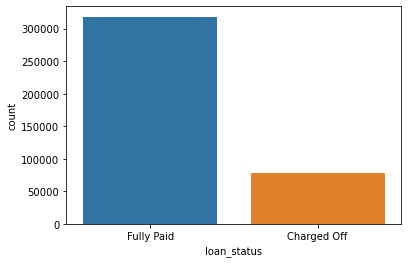

In [7]:
#Check count plot of loan status
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt'>

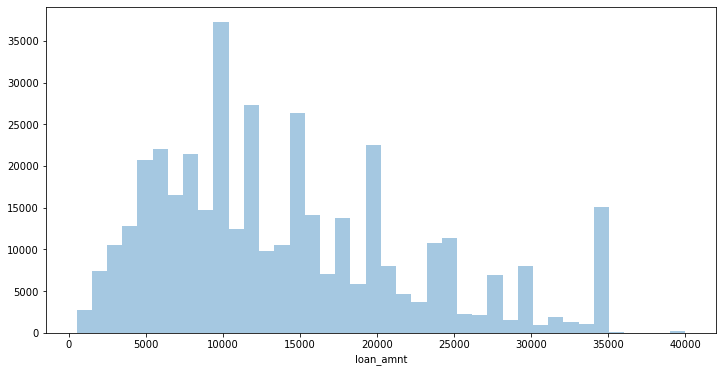

In [8]:
#Check histogram of loan amount
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [9]:
#Show correlation
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

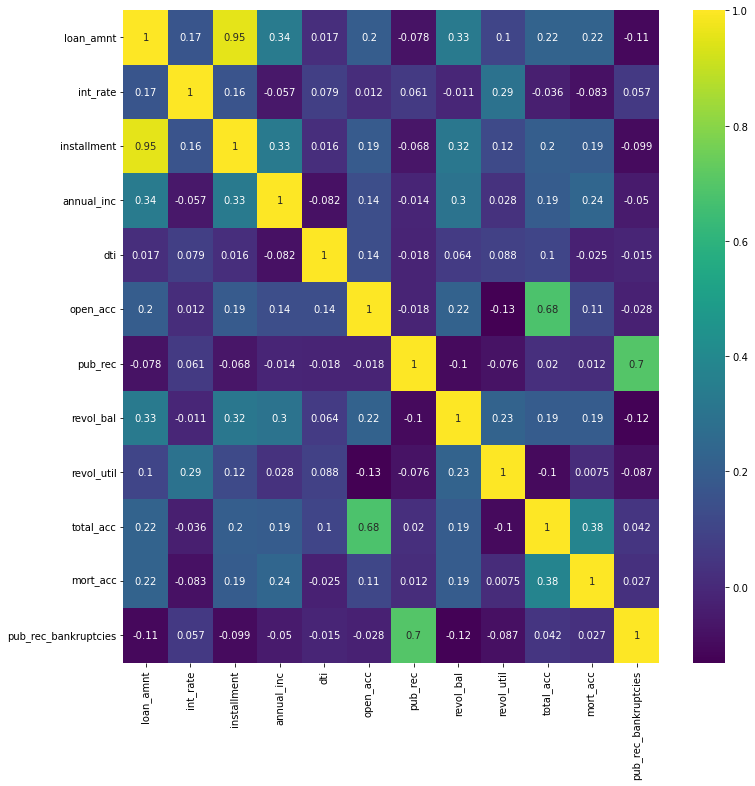

In [10]:
#Visualize correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [11]:
#Check installment info
feature_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [12]:
#Check loan amount info
feature_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

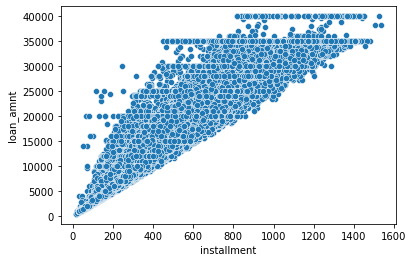

In [13]:
#Check correlation
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

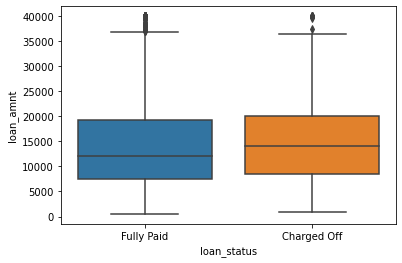

In [14]:
#Check loan amount vs status
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [15]:
#Get stats by loan status
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [16]:
#Check unique grades
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [17]:
#Check unique sub grades
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

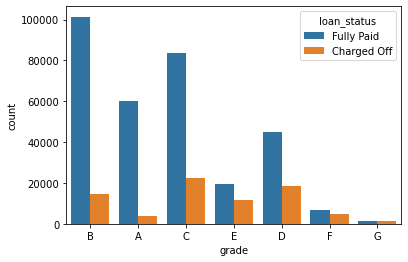

In [18]:
#Check count plot of grade by loan status
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

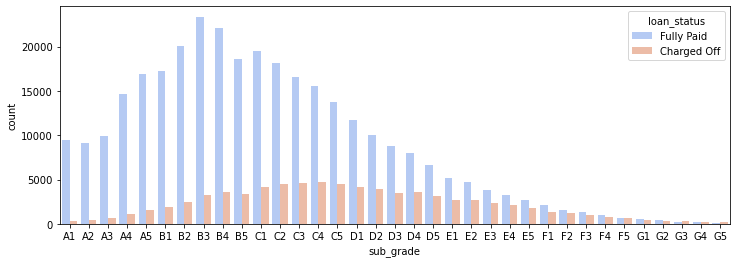

In [19]:
#Check count plot of sub grade by loan status
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order=subgrade_order,palette='coolwarm',hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

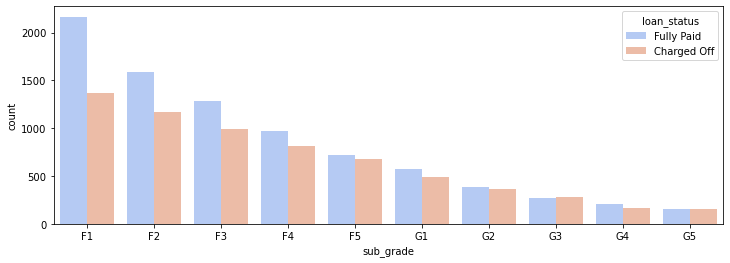

In [20]:
#Check count plot of bad sub grades F and G by loan status
f_g = df[(df['grade']=='F') | (df['grade']=='G') ]    
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_g, order=subgrade_order,palette='coolwarm',hue='loan_status')

In [21]:
#Create new feature loan repaid by converting loan status feature to numeric form
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [22]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

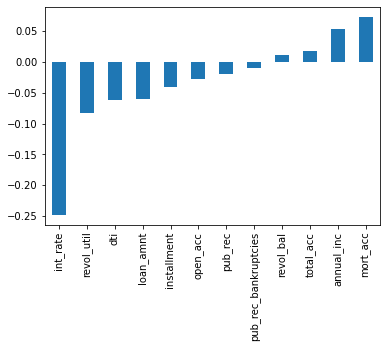

In [23]:
#Plot correlated numeric features to loan repaid
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [24]:
#Check missing data %
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [25]:
#Check info for feature missing data
print('emp_title:')
feature_info("emp_title")
print('emp_length:')
feature_info("emp_length")
print('title:')
feature_info("title")
print('revol_util:')
feature_info("revol_util")
print('mort_acc:')
feature_info("mort_acc")
print('pub_rec_bankruptcies:')
feature_info("pub_rec_bankruptcies")

emp_title:
The job title supplied by the Borrower when applying for the loan.*
emp_length:
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
title:
The loan title provided by the borrower
revol_util:
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
mort_acc:
Number of mortgage accounts.
pub_rec_bankruptcies:
Number of public record bankruptcies


In [26]:
#Check count of titles
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [27]:
#Drop emp_title as too many unique values
df = df.drop('emp_title',axis=1)

In [28]:
#Gte sorted employee length
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

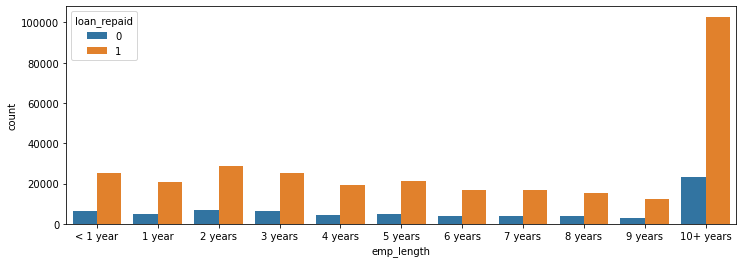

In [29]:
#Check count by employee length and loan repayment
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years',
         '5 years','6 years','7 years','8 years','9 years','10+ years']
plt.figure(figsize=(12,4))
sns.countplot(df['emp_length'],order =emp_length_order ,hue=df['loan_repaid'])

In [30]:
#Loan not paid group by emp_length
emp_co = df[df['loan_repaid']==0].groupby('emp_length').count()['loan_status']

In [31]:
#Loan paid group by emp_length
enp_po = df[df['loan_repaid']==1].groupby('emp_length').count()['loan_status']

In [32]:
#Check for % of people that don't pay off their loan per employment length category
emp_ratio = emp_co/(enp_po + emp_co)

<AxesSubplot:xlabel='emp_length'>

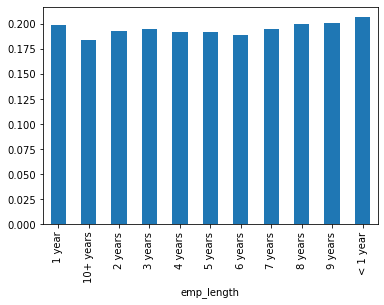

In [33]:
#Plot %
emp_ratio.plot(kind='bar')

In [34]:
#Since there is not much variation per catrgory we drop emp_length
df = df.drop('emp_length',axis=1)

In [35]:
#Check which allf eatures still have missing data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [36]:
#Compare purpose and title features
df[['purpose','title']]

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards
396028,debt_consolidation,Loanforpayoff


In [37]:
#Since there is similar info in purpose we can drop title
df = df.drop('title',axis=1)

In [38]:
#Check mort_acc feature
feature_info('mort_acc')
df['mort_acc'].value_counts()

Number of mortgage accounts.


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

<AxesSubplot:>

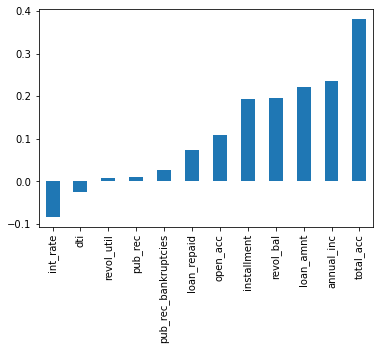

In [39]:
#Find most coreleated feature to mort_acc that can be used to fill up these missing data.
df.corr()['mort_acc'].sort_values().drop('mort_acc').plot(kind='bar')

In [40]:
#Group data by total_acc and get mean mort_acc value   
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [41]:
#Function to fill missing mort_acc values
def fillMortAcc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [42]:
#Fill missing mort_acc values
df['mort_acc'] = df.apply(lambda x:fillMortAcc(x['total_acc'],x['mort_acc']),axis =1)

In [43]:
#Check missing data again
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [44]:
#Drop rows with empty feature values now as the number of records are less wrt dataset size.
df = df.dropna()

In [45]:
#No missing data now
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [46]:
#Get categorical columns
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [47]:
#Check term counts
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [48]:
#Convert categorical feature term to numeric
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [49]:
#Check term counts
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [50]:
#Since there is similar info in sub grade we can drop grade
df = df.drop('grade',axis=1)

In [51]:
#Get dummy variable for sub grade
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
#Drop sub grade and concatinate
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [52]:
#Get columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [53]:
#Get categorical columns
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [54]:
#Use one-hot coding to convert verification_status, application_type, initial_list_status, purpose
dummies = pd.get_dummies(df[['verification_status','purpose','initial_list_status','application_type']],drop_first=True)
df = pd.concat([df.drop(['verification_status','purpose','initial_list_status','application_type'],axis=1),dummies],axis=1)

In [55]:
#Check value counts for home_ownership
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [56]:
#Replace NONE and ANY with OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [57]:
#Check value counts for home_ownership
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [58]:
#Convert home_ownership to dummy variables
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [59]:
#Check address
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [60]:
#Extract zip code
df['zip_code'] = df['address'].apply(lambda addr: addr[-5:])

In [61]:
#Check value counts of zip code
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [62]:
#Not too many categories for zip code so we can create dummy features of it.
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [63]:
#Now drop address as its not needed anymore
df = df.drop('address',axis=1)

In [64]:
#Check info for issue_d
feature_info('issue_d')

The month which the loan was funded


In [65]:
#We can drop issue_d as this field is populated after loan is approved. 
#Since we are trying to predict whether to approve or reject loan this field is useless for model training.
df = df.drop('issue_d',axis=1)

In [66]:
#Check info for issue_d
feature_info('earliest_cr_line')
df['earliest_cr_line']

The month the borrower's earliest reported credit line was opened


0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [67]:
#Extract year from earliest_cr_line
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda yr: int(yr[-4:]))

In [68]:
#No need to convert to dummy as year has a continuous numeric value
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [69]:
#Check categorical fields
df.select_dtypes(['object']).columns
#Drop loan_status
df = df.drop('loan_status',axis=1)

In [70]:
#Define features and target variable
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [71]:
#Reduce dataset size as running locally to save training time.
df = df.sample(frac=0.2,random_state=101)
len(df)

79044

In [72]:
#Split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [73]:
#Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
#Check shape of train
X_train.shape

(316175, 78)

In [75]:
model = Sequential()

model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.2)) 
#20% of the 30 neurons in the above layer will be turned off randomly in every batch

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))

#Binary Classification
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [76]:
#Deinf early stopping criterian
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25, verbose =1)

In [77]:
#Train model
model.fit(x = X_train, y = y_train, validation_data = (X_test,y_test), 
           batch_size = 512, epochs = 100, callbacks=early_stop)

Epoch 1/100
618/618 [==============================] - 3s 4ms/step - loss: 0.3321 - val_loss: 0.2659
Epoch 2/100
618/618 [==============================] - 2s 4ms/step - loss: 0.2681 - val_loss: 0.2640
Epoch 3/100
618/618 [==============================] - 2s 4ms/step - loss: 0.2648 - val_loss: 0.2626
Epoch 4/100
618/618 [==============================] - ETA: 0s - loss: 0.263 - 3s 4ms/step - loss: 0.2633 - val_loss: 0.2621
Epoch 5/100
618/618 [==============================] - 2s 4ms/step - loss: 0.2622 - val_loss: 0.2619
Epoch 6/100
618/618 [==============================] - 2s 4ms/step - loss: 0.2612 - val_loss: 0.2617
Epoch 7/100
618/618 [==============================] - 2s 4ms/step - loss: 0.2606 - val_loss: 0.2619
Epoch 8/100
618/618 [==============================] - 2s 4ms/step - loss: 0.2601 - val_loss: 0.2615
Epoch 9/100
618/618 [==============================] - 2s 4ms/step - loss: 0.2599 - val_loss: 0.2614
Epoch 10/100
618/618 [==============================] - 2s 4ms/step

<AxesSubplot:>

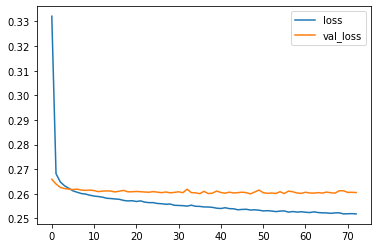

In [78]:
#Check and plot loss
losses_early_dropout = pd.DataFrame(model.history.history)
losses_early_dropout.plot()

In [79]:
#Make predictions on Test set
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [80]:
#Show classification report
print(classification_report(y_test,predictions))
#Since class is imbalnced, the performance is not that good.
#The f1-score of the class with smaller counts gives a good indication of model performance.

              precision    recall  f1-score   support

           0       0.96      0.45      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [81]:
#Show confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 7115  8543]
 [  307 63079]]


In [82]:
#Save model
model.save('tensorflowLoanModel.h5')

In [83]:
#Load saved model
loaded_model = load_model('tensorflowLoanModel.h5')

In [84]:
#Test model on a new customer
random_seed = 101
rand_idx = random.randint(0,len(df))
new_customer = df.drop('loan_repaid',axis=1).iloc[rand_idx]
new_customer

loan_amnt      16000.00
term              36.00
int_rate           6.03
installment      486.97
annual_inc     86000.00
                 ...   
30723              0.00
48052              1.00
70466              0.00
86630              0.00
93700              0.00
Name: 185122, Length: 78, dtype: float64

In [85]:
#Scale new data
scaled_new_cust = scaler.transform(new_customer.values.reshape(1,78))

In [86]:
#Make prediction
predicted = loaded_model.predict_classes(scaled_new_cust)
predicted

array([[1]])

In [87]:
#True value
df.iloc[rand_idx]['loan_repaid']
#We got it RIGHT!!!

1.0